In [5]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import recall_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bilal/Assingment_5/Train.csv")

In [3]:
data.head()

,Labels,Text,Text_Tag
0,1,Says the Annies List political group supports ...,abortion
1,2,When did the decline of coal start? It started...,"energy,history,job-accomplishments"
2,3,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy
3,1,Health care reform legislation is likely to ma...,health-care
4,2,The economic turnaround started at the end of ...,"economy,jobs"


**distribution variable**

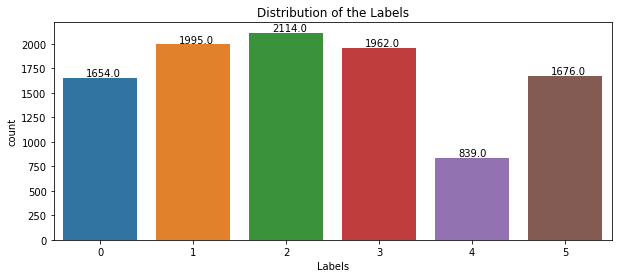

In [4]:
plt.figure(figsize = (10,4))
ax = sns.countplot(x="Labels", data=data)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+15))
plt.title("Distribution of the Labels")
plt.show()

**Normalizing the text**

In [6]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
import string
from tqdm import tqdm
tqdm.pandas()

In [8]:
data['Original Text'] = data['Text']


In [9]:
print("Original text: ")

print(data['Text'][0])

Original text: 
Says the Annies List political group supports third-trimester abortions on demand.


In [10]:
data["Text"] = data["Text"].str.lower()

In [11]:
stopwords_ = set(stopwords.words('english'))

def stopwords_removal(text):
    return " ".join([word for word in str(text).split() if word not in stopwords_])

tqdm.pandas()
data['Text'] = data['Text'].progress_apply(lambda text: stopwords_removal(text))

100%|██████████| 10240/10240 [00:00<00:00, 79673.79it/s]


In [12]:
print("After removing stopwords: ")

print(data['Text'][0])

After removing stopwords: 
says annies list political group supports third-trimester abortions demand.


In [13]:
punctuations= list(string.punctuation)

def cleaning_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

data['Text'] = data['Text'].progress_apply(lambda text: cleaning_punctuations(text))

100%|██████████| 10240/10240 [00:00<00:00, 109061.36it/s]


In [14]:
print("After removing punctuations: ")

print(data['Text'][0])

After removing punctuations: 
says annies list political group supports thirdtrimester abortions demand


**Word Cloud** for fake news

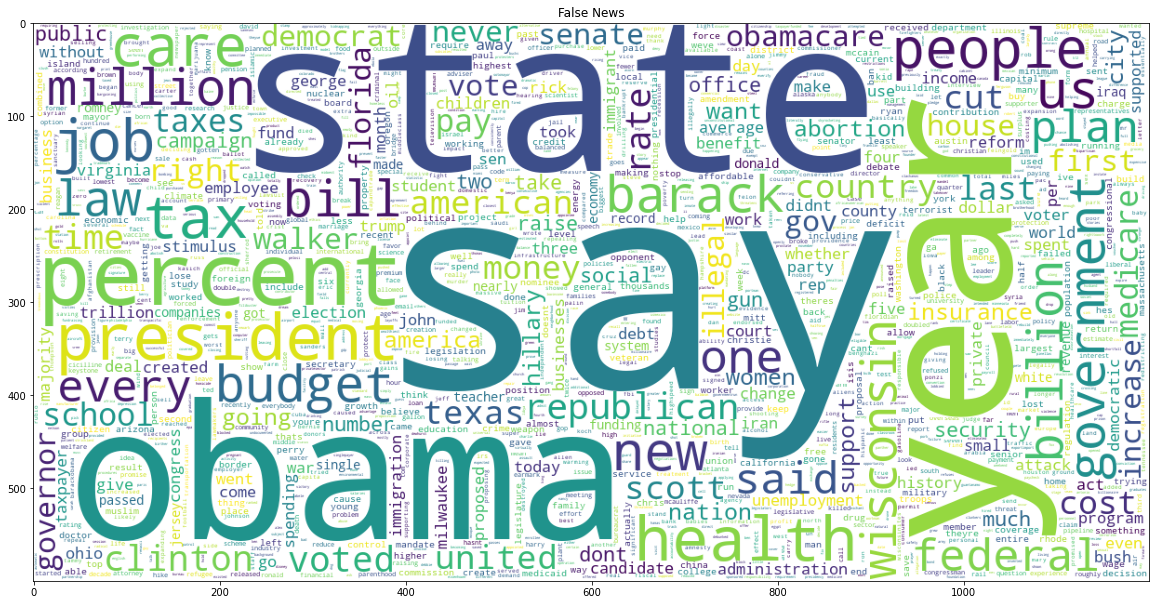

In [16]:
from wordcloud import WordCloud 
wc = WordCloud(background_color='white', max_words = 2000 , width = 1200 , height = 600, 
               collocations=False).generate(" ".join(data[data['Labels']==1]['Text']))
plt.figure(figsize = (20,20))
plt.title("False News")
plt.imshow(wc)

**Split the clean text and labels into a train and test  with 80:20 ratio**

In [42]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa

In [43]:
!pip install tensorflow-addons==0.8.3
!pip install tensorflow==2.2.0-rc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0-rc3 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+zzzcolab20220516125453, 2.6.5, 2.6.5+zzzcolab20220523104206, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.0+zzzcolab20220506150900, 2.7.1, 2.7.2, 2.7.2+zzzcolab20220516114640, 2.7.3, 2.7.3+zzzcolab20220523111007, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.0+zzzcolab20220506162203, 2.8.1, 2.8.1+zzzcolab20220516111314, 2.8.1+zzzcolab20220518083849, 2.8.2, 2.8

In [44]:
num_classes = (data['Labels'].nunique())


In [45]:
X = data['Text']
y = tf.keras.utils.to_categorical(data['Labels'], num_classes)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**Tokenize the clean text on the training set using TF**

In [47]:
train_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
train_tokenizer.fit_on_texts(X_train.values)
train_word_index = train_tokenizer.word_index

In [48]:
train_tokenizer


In [49]:
vocab_length = len(train_word_index) + 1
vocab_length

12084

In [50]:
train_sequences = train_tokenizer.texts_to_sequences(X_train)
len(train_sequences)

8192

In [51]:
test_sequences = train_tokenizer.texts_to_sequences(X_test)
len(test_sequences)

2048

In [52]:
maxlen=20
train_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=maxlen, truncating='post')
test_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=maxlen, truncating='post')


** RNN Model**

In [53]:
embedding_dim = 6
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=maxlen),
    tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(32, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(16, activation='tanh'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=tfa.metrics.F1Score(num_classes=num_classes))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 6)             72504     
                                                                 
 simple_rnn (SimpleRNN)      (None, 20, 64)            4544      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20, 32)            3104      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 16)                784       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 6)                 1

In [54]:
history = model.fit(train_padded_seqeunces, y_train, epochs=20, validation_data=(test_padded_seqeunces, y_test))


Epoch 1/20
256/256 [==============================] - ETA: 0s - loss: 1.7753 - f1_score: 0.1503

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2034: UserWarning: Metric F1Score implements a `reset_states()` method; rename it to `reset_state()` (without the final "s"). The name `reset_states()` has been deprecated to improve API consistency.
  m.reset_state()


256/256 [==============================] - 34s 107ms/step - loss: 1.7753 - f1_score: 0.1503 - val_loss: 1.7583 - val_f1_score: 0.0640
Epoch 2/20
256/256 [==============================] - 20s 79ms/step - loss: 1.7424 - f1_score: 0.1564 - val_loss: 1.7681 - val_f1_score: 0.1216
Epoch 3/20
256/256 [==============================] - 13s 51ms/step - loss: 1.6335 - f1_score: 0.2510 - val_loss: 1.8141 - val_f1_score: 0.1565
Epoch 4/20
256/256 [==============================] - 11s 45ms/step - loss: 1.4190 - f1_score: 0.3971 - val_loss: 2.0091 - val_f1_score: 0.1662
Epoch 5/20
256/256 [==============================] - 13s 52ms/step - loss: 1.1800 - f1_score: 0.5410 - val_loss: 2.3366 - val_f1_score: 0.1747
Epoch 6/20
256/256 [==============================] - 16s 61ms/step - loss: 0.9441 - f1_score: 0.6612 - val_loss: 2.5576 - val_f1_score: 0.1712
Epoch 7/20
256/256 [==============================] - 12s 47ms/step - loss: 0.7505 - f1_score: 0.7473 - val_loss: 2.8731 - val_f1_score: 0.1788
Ep

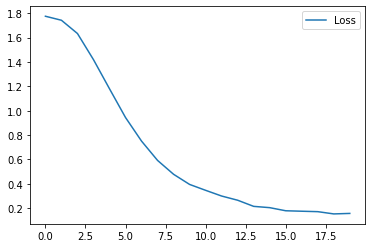

In [55]:
plt.plot(history.history['loss'], label='Loss')

plt.legend()
plt.show()

In [56]:
model.evaluate(test_padded_seqeunces, y_test)

64/64 [==============================] - 1s 8ms/step - loss: 5.0200 - f1_score: 0.1811


[5.0200090408325195,
 array([0.14058356, 0.21695761, 0.23140496, 0.17931035, 0.14577259,
        0.1728    ], dtype=float32)]

In [57]:
test_prob = model.predict(test_padded_seqeunces)
test_pred = np.where(test_prob > 0.5, 1, 0)

**Model Performance**

In [58]:
from sklearn.metrics import f1_score, log_loss, multilabel_confusion_matrix, plot_confusion_matrix


In [59]:
print("Log-Loss =", log_loss(y_test, test_prob))


Log-Loss = 5.020009644595547


In [60]:
print("F1-Score =", f1_score(y_test, test_pred, average = 'weighted'))


F1-Score = 0.18453698414798245


In [61]:
labels = ['Barely-True', 'False', 'Half-True', 'Mostly-True', 'Not-Known', 'True']
cm = multilabel_confusion_matrix(y_test, test_pred)


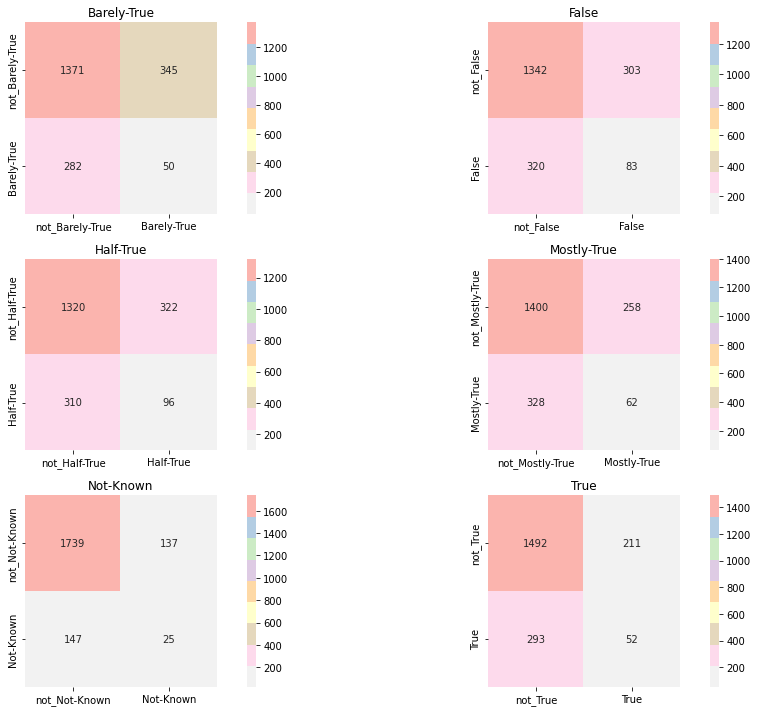

In [62]:
fig = plt.figure(figsize = (15, 10))
for i, (label, matrix) in enumerate(zip(labels, cm)):
    plt.subplot(3, 2, i+1)
    l = [f'not_{label}', label]
    sns.heatmap(matrix, annot = True, square = True, xticklabels = l, yticklabels = l, cmap='Pastel1_r', fmt='d')
    plt.title(label)
    
plt.tight_layout()
plt.show()